In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive



In [2]:
df = pd.read_csv(r'/content/drive/MyDrive/patent project/clean_data_with_enrich.csv',dtype={'filing_year':'str'})

<ipython-input-2-5863b33d8245>:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'/content/drive/MyDrive/patent project/clean_data_with_enrich.csv',dtype={'filing_year':'str'})


In [ ]:
pd.set_option('display.max_columns', None)


In [ ]:
#how many records
df.shape

(255278, 37)

In [ ]:
df.describe(include='all')

,application_number,uspc_class,one_if_male,one_if_female,filing_year,one_if_patented,one_if_abandoned,one_if_pending,one_if_small,Biotechnology,Chem_Material_Engr,Comp_Archit,Comp_Net,Comms,Semis,Trans,Mech_Engr,abstract,clean_abstract,kinkade,word_count,char_count,median_word_length,avg_word_length,skew_word_length,characters_per_word,syll_per_word,words_per_sentence,sentences_per_paragraph,type_token_ratio,syllables,sentences,long_words,complex_words,Gender_Target,Patent_Target,Parent_Catgeory
count,2.552780e+05,255278.0,255278.000000,255278.000000,255278,255278.000000,255278.000000,255278.000000,255278.000000,255278.000000,255278.000000,255278.000000,255278.000000,255278.000000,255278.000000,255278.000000,255278.000000,255278,255278,255278.000000,255278.000000,255278.000000,255278.000000,255278.000000,255277.000000,255278.000000,255278.000000,255278.000000,255278.000000,255278.000000,255278.000000,255278.000000,255278.000000,255278.000000,255278,255278,255278
unique,NaN,805.0,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,255278,252123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3,8
top,NaN,705.0,NaN,NaN,2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Technologies are generally described for contr...,soybean cultivar designated disclosed inventio...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Male,patented,Trans
freq,NaN,11374.0,NaN,NaN,37313,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,845,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,229111,160264,66443
mean,1.526624e+07,NaN,0.897496,0.102504,NaN,0.627802,0.275938,0.096260,0.559355,0.058336,0.079972,0.061196,0.068094,0.082725,0.137771,0.260277,0.251628,NaN,NaN,17.693210,108.563719,554.301189,4.850058,5.265622,0.586337,5.142831,1.677217,34.595006,3.949588,0.527002,180.119278,3.949588,34.911528,23.650224,NaN,NaN,NaN
std,9.545869e+05,NaN,0.303310,0.303310,NaN,0.483392,0.446987,0.294948,0.496465,0.234379,0.271250,0.239690,0.251908,0.275467,0.344661,0.438787,0.433949,NaN,NaN,10.067493,39.918374,203.134642,0.853686,0.538145,0.366869,0.487938,0.212303,25.008315,2.047750,0.135210,66.320808,2.047750,14.403560,10.951291,NaN,NaN,NaN
min,1.305488e+07,NaN,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,-15.200000,1.000000,1.000000,1.000000,1.000000,-1.362793,1.000000,0.000000,1.000000,1.000000,0.050497,0.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN
25%,1.446628e+07,NaN,1.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,12.016069,79.000000,406.000000,4.000000,4.901639,0.363632,4.806452,1.531532,21.142857,2.000000,0.428571,132.000000,2.000000,25.000000,16.000000,NaN,NaN,NaN
50%,1.520876e+07,NaN,1.000000,0.000000,NaN,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,15.014513,111.000000,566.000000,5.000000,5.216418,0.549309,5.104348,1.662577,26.750000,4.000000,0.508772,183.000000,4.000000,34.000000,22.000000,NaN,NaN,NaN
75%,1.604512e+07,NaN,1.000000,0.000000,NaN,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,NaN,NaN,19.476724,141.000000,703.000000,5.000000,5.571429,0.757128,5.435897,1.806452,37.000000,5.000000,0.606557,227.000000,5.000000,44.000000,30.000000,NaN,NaN,NaN


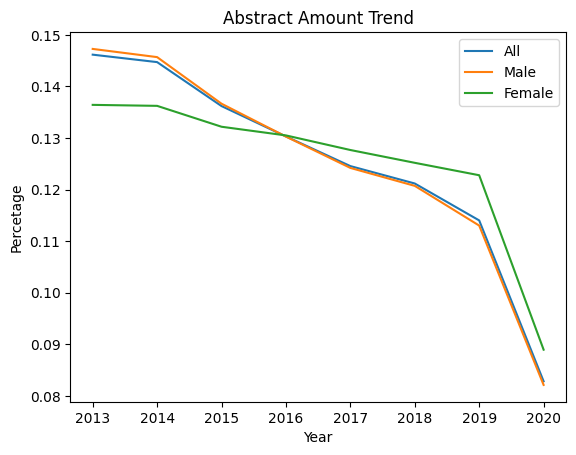

In [ ]:
#how many each year
all = sns.lineplot(data=df['filing_year'].value_counts(normalize=True).reset_index(),x='index',y='filing_year',label='All')
Male = sns.lineplot(data=df[df['Gender_Target']=='Male']['filing_year'].value_counts(normalize=True).reset_index(),x='index',y='filing_year',label='Male')
Female = sns.lineplot(data=df[df['Gender_Target']=='Female']['filing_year'].value_counts(normalize=True).reset_index(),x='index',y='filing_year',label='Female')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Percetage')
plt.title('Abstract Amount Trend')
plt.show()

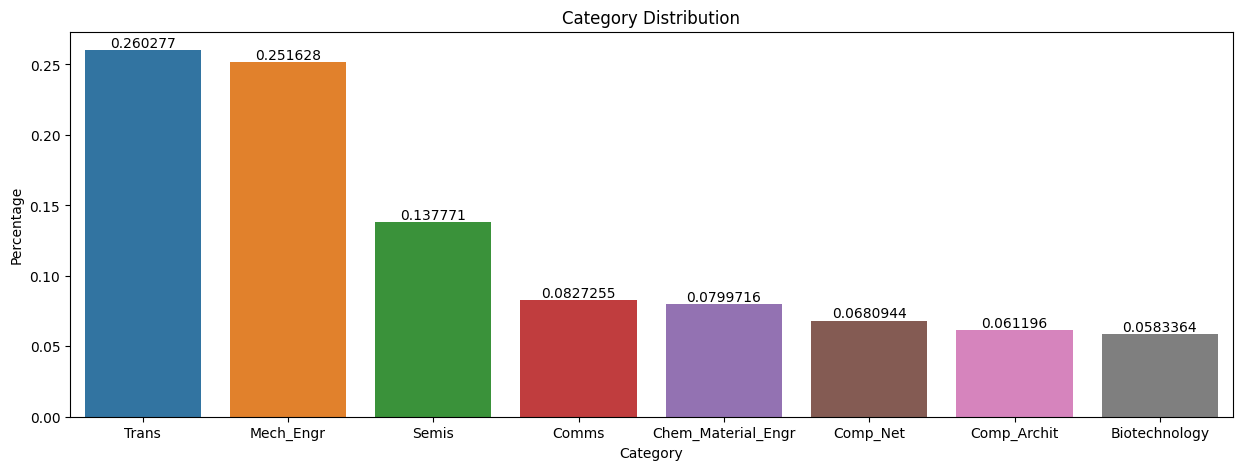

In [ ]:
#how many in each category
plt.figure(figsize=(15,5))
countplot=sns.barplot(df['Parent_Catgeory'].value_counts(normalize=True).reset_index(),x='index',y='Parent_Catgeory')
for i in countplot.containers:
    countplot.bar_label(i,)
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.title('Category Distribution')
plt.show()


In [ ]:
#male vs female
df['Gender_Target'].value_counts(normalize=True)

Male      0.897496
Female    0.102504
Name: Gender_Target, dtype: float64

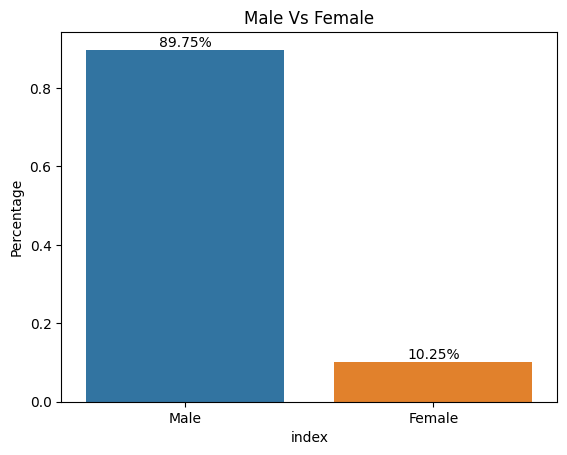

In [ ]:
countplot=sns.barplot(df['Gender_Target'].value_counts(normalize=True).reset_index(),x='index',y='Gender_Target')
plt.title('Male Vs Female')
for p in countplot.patches:
    countplot.annotate(f'{str(round(p.get_height()*100,3))+"%"}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.ylabel('Percentage')
plt.show()


In [ ]:
cat_by_gender = df.groupby(['Gender_Target','Parent_Catgeory'])['application_number'].count().reset_index()
cat_by_gender['Percentage'] =  round(cat_by_gender['application_number']*100/ cat_by_gender.groupby('Gender_Target')['application_number'].transform('sum'),3)

In [ ]:
cat_by_gender

,Gender_Target,Parent_Catgeory,application_number,Percentage
0,Female,Biotechnology,2446,9.348
1,Female,Chem_Material_Engr,1880,7.185
2,Female,Comms,1885,7.204
3,Female,Comp_Archit,1178,4.502
4,Female,Comp_Net,1220,4.662
5,Female,Mech_Engr,8768,33.508
6,Female,Semis,2198,8.400
7,Female,Trans,6592,25.192
8,Male,Biotechnology,12446,5.432
9,Male,Chem_Material_Engr,18535,8.090


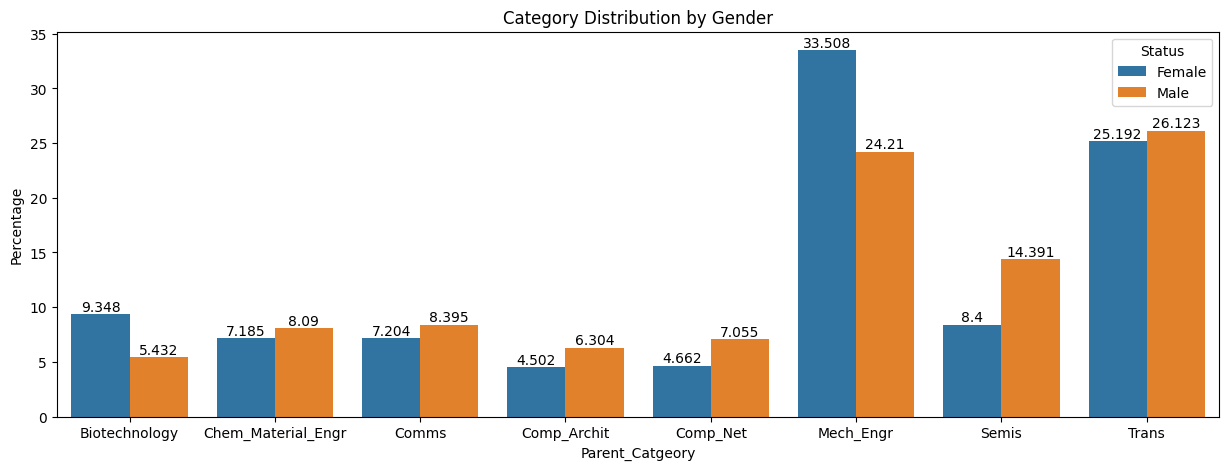

In [ ]:
plt.figure(figsize=(15,5))
countplot = sns.barplot(data=cat_by_gender, x='Parent_Catgeory', y='Percentage', hue='Gender_Target')
for i in countplot.containers:
    countplot.bar_label(i,)
plt.title('Category Distribution by Gender')
plt.xlabel('Parent_Catgeory')
plt.ylabel('Percentage')
plt.legend(title='Status')
plt.show()


In [ ]:
#texr char per gender
text_char_df_gender =  df[['kinkade','word_count','char_count','median_word_length','avg_word_length','skew_word_length','characters_per_word','syll_per_word','words_per_sentence',
                    'sentences_per_paragraph','type_token_ratio','syllables','sentences','long_words','complex_words']]



In [ ]:
normalized_df = (text_char_df_gender - text_char_df_gender.mean())/text_char_df_gender.std()

In [ ]:
normalized_df = pd.concat([normalized_df,df['Gender_Target']], axis = 1)

In [ ]:
normalized_df_melt = pd.melt(normalized_df, id_vars='Gender_Target', var_name='features', value_name='value')

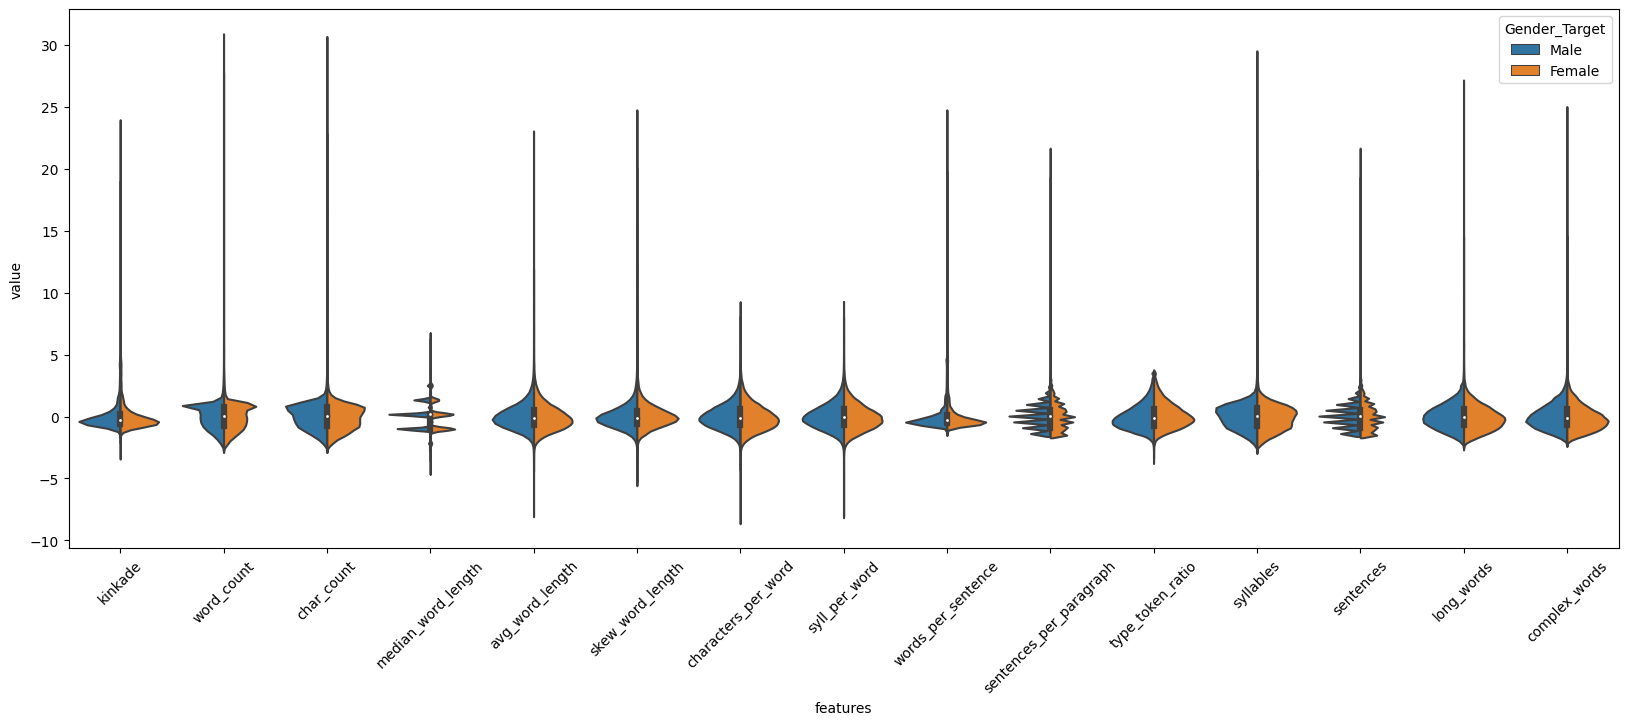

In [ ]:
plt.figure(figsize=(20,7))
sns.violinplot(data=normalized_df_melt, x = 'features', y='value', hue = 'Gender_Target',split=True)
plt.xticks(rotation=45)
plt.show()

In [3]:
#texr char per patnede staus
df = df[(df['one_if_small']==1) & (df['Patent_Target']!='pending')]

In [ ]:
df['Patent_Target'].value_counts(normalize=True)

patented     0.59526
abandoned    0.40474
Name: Patent_Target, dtype: float64

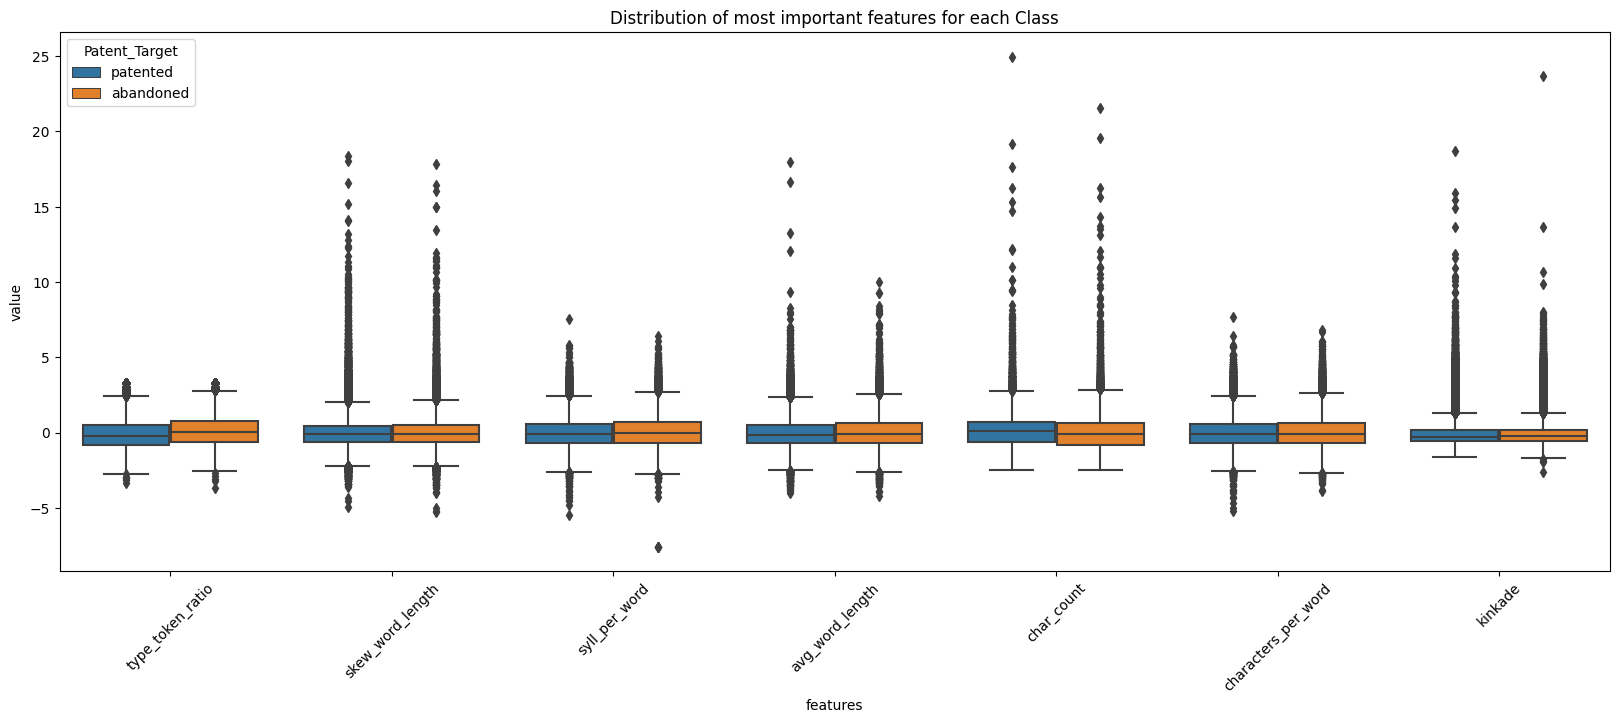

In [21]:
text_char_df_gender =  df[['type_token_ratio',
'skew_word_length',
'syll_per_word',
'avg_word_length',
'char_count',
'characters_per_word',
'kinkade']]

normalized_df = (text_char_df_gender - text_char_df_gender.mean())/text_char_df_gender.std()

normalized_df = pd.concat([normalized_df,df['Patent_Target']], axis = 1)
normalized_df_melt = pd.melt(normalized_df, id_vars='Patent_Target', var_name='features', value_name='value')
plt.figure(figsize=(20,7))
sns.boxplot(data=normalized_df_melt, x = 'features', y='value', hue = 'Patent_Target')
plt.title('Distribution of most important features for each Class')
plt.xticks(rotation=45)
plt.show()

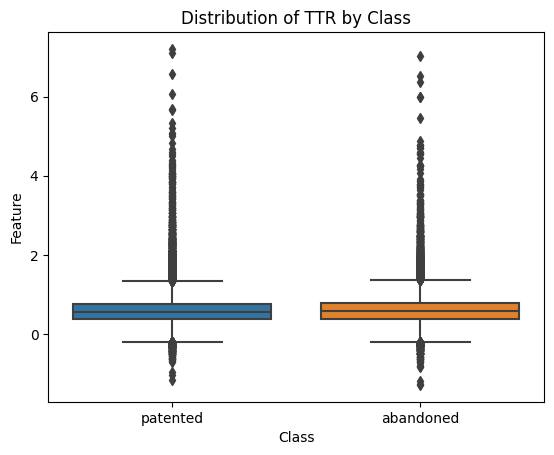

In [16]:
sns.boxplot(x='Patent_Target', y='skew_word_length', data=df)
plt.xlabel('Class')
plt.ylabel('Feature')
plt.title('Distribution of TTR by Class')
plt.show()

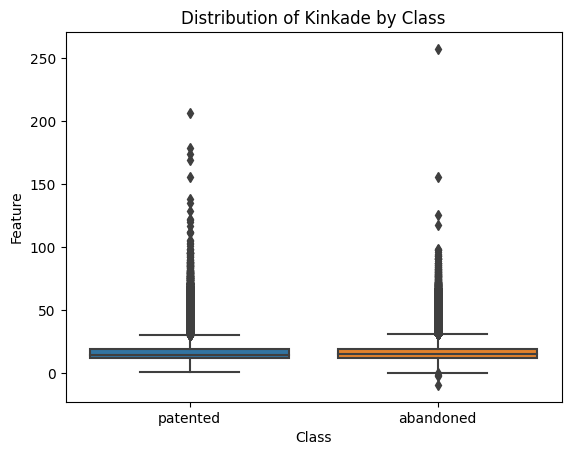

In [15]:
sns.boxplot(x='Patent_Target', y='kinkade', data=df)
plt.xlabel('Class')
plt.ylabel('Feature')
plt.title('Distribution of Kinkade by Class')
plt.show()

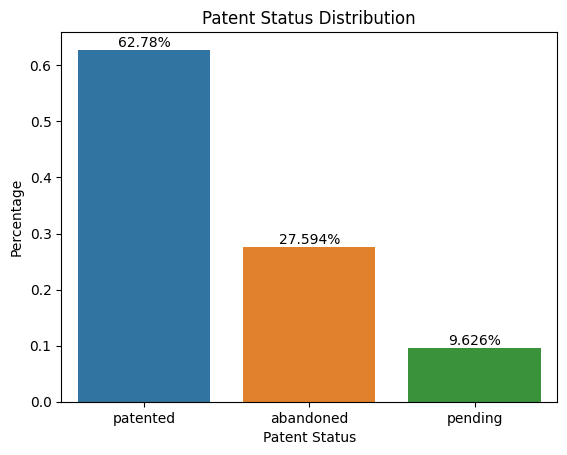

In [ ]:
#patent status

countplot=sns.barplot(df['Patent_Target'].value_counts(normalize=True).reset_index(),x='index',y='Patent_Target')
for p in countplot.patches:
    countplot.annotate(f'{str(round(p.get_height()*100,3))+"%"}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.title('Patent Status Distribution')
plt.xlabel('Patent Status')
plt.ylabel('Percentage')
plt.show()


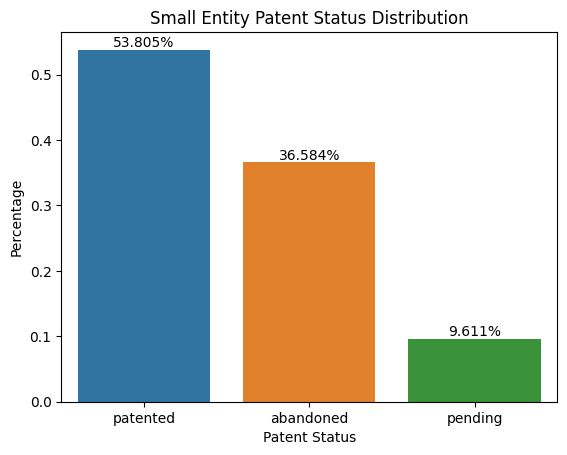

In [ ]:
#patent status

countplot=sns.barplot(df[df['one_if_small']==1]['Patent_Target'].value_counts(normalize=True).reset_index(),x='index',y='Patent_Target')
for p in countplot.patches:
    countplot.annotate(f'{str(round(p.get_height()*100,3))+"%"}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.title('Small Entity Patent Status Distribution')
plt.xlabel('Patent Status')
plt.ylabel('Percentage')
plt.show()


In [ ]:
status_by_gender = df.groupby(['Gender_Target','Patent_Target'])['application_number'].count().reset_index()
status_by_gender['Percentage'] =  round(status_by_gender['application_number']*100/ status_by_gender.groupby('Gender_Target')['application_number'].transform('sum'),3)

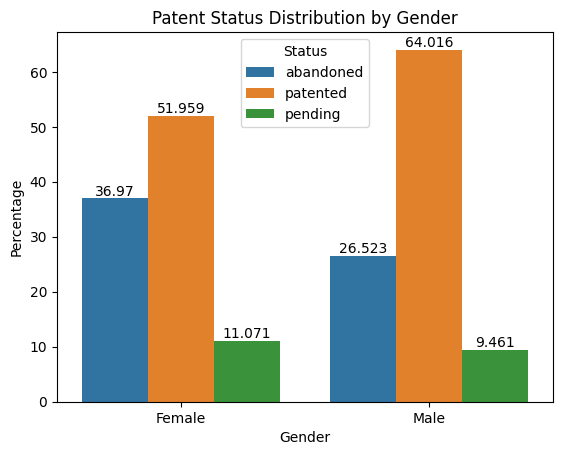

In [ ]:
countplot = sns.barplot(data=status_by_gender, x='Gender_Target', y='Percentage', hue='Patent_Target')
for i in countplot.containers:
    countplot.bar_label(i,)
plt.title('Patent Status Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Percentage')
plt.legend(title='Status')
plt.show()


In [ ]:
#female and reject rate per category
cat_reject_rate = df.groupby(['Parent_Catgeory','Gender_Target','Patent_Target','one_if_small'])['application_number'].count().reset_index()

In [ ]:
cat_reject_rate['how_many'] = cat_reject_rate.groupby(['Parent_Catgeory','Gender_Target'])['application_number'].transform('sum')

In [ ]:
all_reject_rate = cat_reject_rate[cat_reject_rate['Patent_Target']=='abandoned']

In [ ]:
all_reject_rate['all_reject'] = all_reject_rate.groupby(['Parent_Catgeory','Gender_Target'])['application_number'].transform('sum')

<ipython-input-42-d4cf703027aa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_reject_rate['all_reject'] = all_reject_rate.groupby(['Parent_Catgeory','Gender_Target'])['application_number'].transform('sum')


In [ ]:
all_reject_rate=all_reject_rate[['Parent_Catgeory','how_many','all_reject','Gender_Target']].drop_duplicates()

In [ ]:
all_reject_rate['reject_rate'] = round(all_reject_rate['all_reject']/all_reject_rate['how_many'],2)

In [ ]:
all_reject_rate

,Parent_Catgeory,how_many,all_reject,Gender_Target,reject_rate
0,Biotechnology,2446,873,Female,0.356909
6,Biotechnology,12446,3710,Male,0.298088
12,Chem_Material_Engr,1880,700,Female,0.372340
18,Chem_Material_Engr,18535,5787,Male,0.312220
24,Comms,1885,488,Female,0.258886
30,Comms,19233,3727,Male,0.193782
36,Comp_Archit,1178,280,Female,0.237691
42,Comp_Archit,14444,3132,Male,0.216837
48,Comp_Net,1220,272,Female,0.222951
54,Comp_Net,16163,3088,Male,0.191054


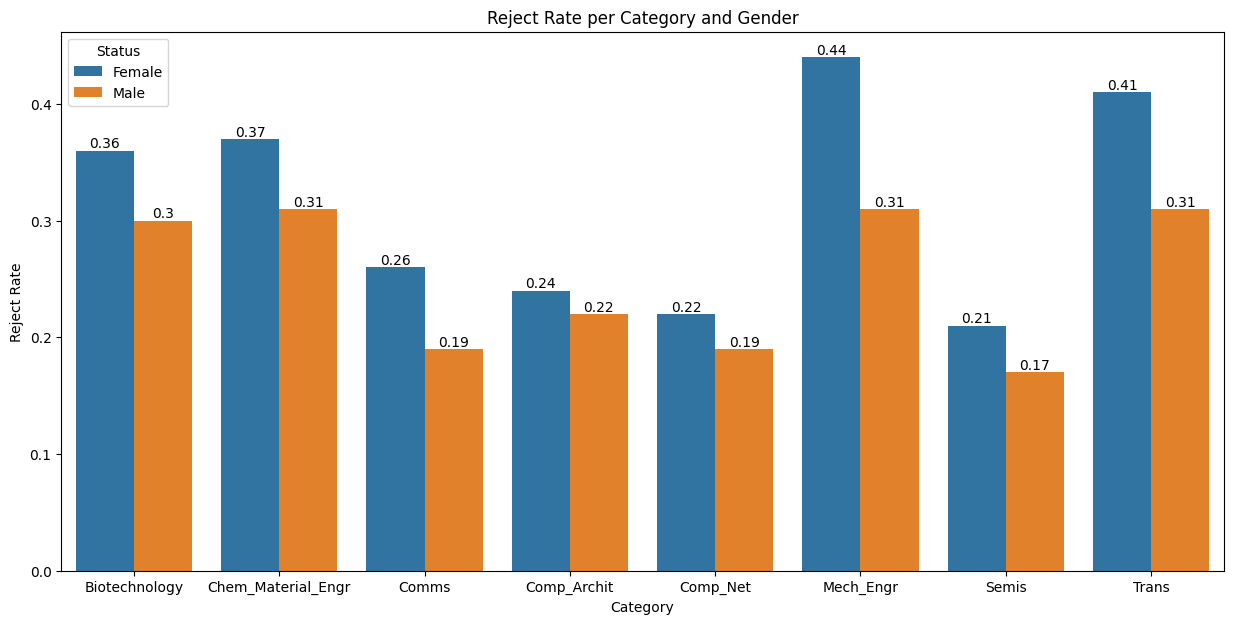

In [ ]:
plt.figure(figsize=(15,7))
countplot = sns.barplot(data=all_reject_rate, x='Parent_Catgeory', y='reject_rate', hue='Gender_Target')
for i in countplot.containers:
    countplot.bar_label(i,)
plt.title('Reject Rate per Category and Gender')
plt.xlabel('Category')
plt.ylabel('Reject Rate')
plt.legend(title='Status')
plt.show()


In [ ]:
cat_reject_rate['Reject_Rate'] = round(cat_reject_rate['application_number']/cat_reject_rate.groupby(['Parent_Catgeory','Gender_Target','one_if_small'])['application_number'].transform('sum'),2)

In [ ]:
cat_reject_rate = cat_reject_rate[cat_reject_rate['Patent_Target']=='abandoned']

In [ ]:
cat_reject_rate

,Parent_Catgeory,Gender_Target,Patent_Target,one_if_small,application_number,Reject_Rate
0,Biotechnology,Female,abandoned,0,191,0.27
1,Biotechnology,Female,abandoned,1,682,0.50
4,Biotechnology,Male,abandoned,0,842,0.17
5,Biotechnology,Male,abandoned,1,2868,0.48
8,Chem_Material_Engr,Female,abandoned,0,167,0.29
9,Chem_Material_Engr,Female,abandoned,1,533,0.51
12,Chem_Material_Engr,Male,abandoned,0,2044,0.29
13,Chem_Material_Engr,Male,abandoned,1,3743,0.42
16,Comms,Female,abandoned,0,106,0.12
17,Comms,Female,abandoned,1,382,0.43


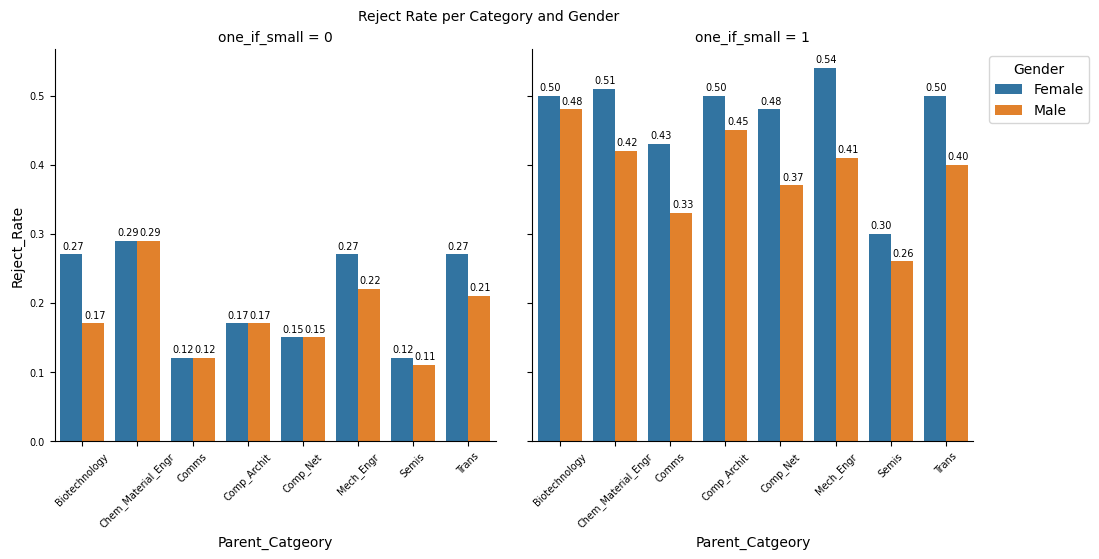

In [ ]:

catplot = sns.catplot(kind = 'bar', data=cat_reject_rate, x= 'Parent_Catgeory',y='Reject_Rate', col = 'one_if_small',hue='Gender_Target',legend=False, legend_out=False)
#countplot = sns.barplot(cat_reject_rate[cat_reject_rate['Patent_Target']=='abandoned'],x='Parent_Catgeory',y='Reject_Rate',hue='Gender_Target')
# Add label values to the plot
catplot.set_xticklabels(rotation=45)
#plt.tight_layout()

plt.legend(title='Gender', bbox_to_anchor=(1.02, 1), loc='upper left')
for ax in catplot.axes.flat:
    ax.tick_params(axis='x', labelsize=7)
    ax.tick_params(axis='y', labelsize=7)
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(1, 6), textcoords='offset points',fontsize=7)
catplot.fig.suptitle('Reject Rate per Category and Gender',fontsize=10)
plt.subplots_adjust(top=0.9)


In [ ]:
cat_reject_rate

,Parent_Catgeory,Gender_Target,Patent_Target,application_number,Reject_Rate,difference
0,Biotechnology,Female,abandoned,682,0.42,NaN
3,Biotechnology,Male,abandoned,2868,0.40,-0.02
6,Chem_Material_Engr,Female,abandoned,533,0.44,NaN
9,Chem_Material_Engr,Male,abandoned,3743,0.37,-0.07
12,Comms,Female,abandoned,382,0.40,NaN
15,Comms,Male,abandoned,2347,0.31,-0.09
18,Comp_Archit,Female,abandoned,159,0.44,NaN
21,Comp_Archit,Male,abandoned,1530,0.39,-0.05
24,Comp_Net,Female,abandoned,160,0.42,NaN
27,Comp_Net,Male,abandoned,1580,0.34,-0.08


In [ ]:
from scipy.stats import mannwhitneyu


In [ ]:
df.head()

,application_number,uspc_class,one_if_male,one_if_female,filing_year,one_if_patented,one_if_abandoned,one_if_pending,one_if_small,Biotechnology,...,words_per_sentence,sentences_per_paragraph,type_token_ratio,syllables,sentences,long_words,complex_words,Gender_Target,Patent_Target,Parent_Catgeory
0,13054882,701,1,0,2013,1,0,0,0,0,...,27.250000,4.0,0.504587,183.0,4.0,35.0,28.0,Male,patented,Trans
1,13260099,424,1,0,2013,0,1,0,0,1,...,37.666667,3.0,0.530973,199.0,3.0,36.0,26.0,Male,abandoned,Biotechnology
2,13261421,424,1,0,2013,1,0,0,1,1,...,19.000000,2.0,0.736842,77.0,2.0,21.0,16.0,Male,patented,Biotechnology
3,13261486,136,1,0,2013,1,0,0,1,0,...,49.000000,3.0,0.653061,282.0,3.0,67.0,51.0,Male,patented,Chem_Material_Engr
4,13261494,362,1,0,2013,1,0,0,1,0,...,45.666667,3.0,0.583942,200.0,3.0,39.0,25.0,Male,patented,Semis


In [ ]:
accepted = df[df['Patent_Target'] == 'patented']['sentences_per_paragraph']
rejected = df[df['Patent_Target'] == 'abandoned']['sentences_per_paragraph']

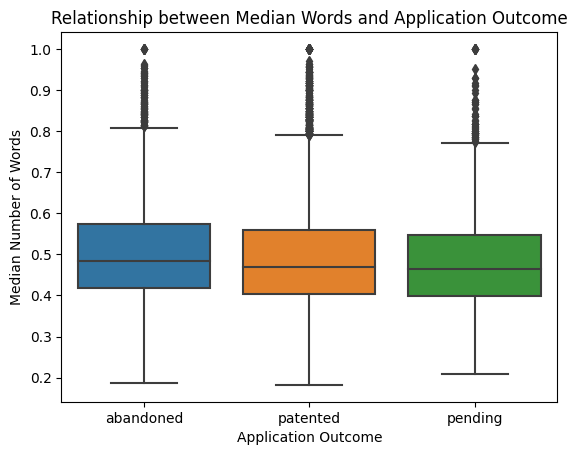

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Patent_Target', y='type_token_ratio', data=df[(df['one_if_small']==0) & (df['Parent_Catgeory']=='Mech_Engr') ])
plt.xlabel('Application Outcome')
plt.ylabel('Median Number of Words')
plt.title('Relationship between Median Words and Application Outcome')
plt.show()